AttributeError: 'float' object has no attribute 'plot'

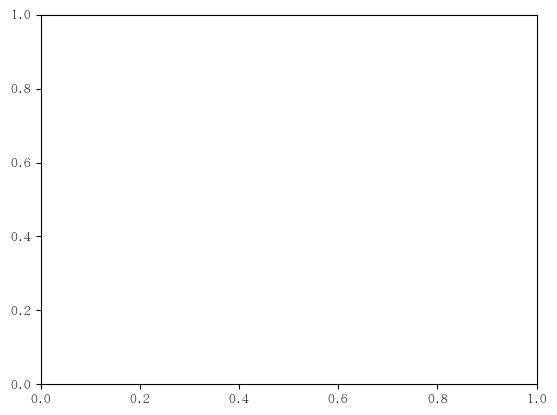

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件中读取数据
df = pd.read_csv('your_file.csv')

# 将价格列转换为数字
df['价格'] = pd.to_numeric(df['价格'], errors='coerce')

# 统计每个区县的房租均价
avg_price_by_county = df.groupby('所在区县')['价格'].mean()

# 统计每个区县中不同房子类型的数量
house_type_count = df.groupby('所在区县')['房子类型'].value_counts().unstack().fillna(0)

# 绘制柱状图
colors = plt.cm.tab20c.colors  # 颜色列表
fig, ax = plt.subplots()
for i, (county, data) in enumerate(avg_price_by_county.items()):
    data.plot(kind='bar', color=colors, ax=ax, position=i, width=0.2, legend=True)
ax.legend(title='所在区县', bbox_to_anchor=(1, 1))  # 设置图例
plt.xlabel('房子类型')
plt.ylabel('数量')
plt.title('各区县房子类型数量对比')
plt.xticks(range(len(house_type_count.columns)), house_type_count.columns)  # 设置X轴刻度
plt.tight_layout()
plt.show()